# Лабораторная работа №5

**Многослойный перцептрон в pytorch**

---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Волгин Алексей Дмитриевич

Группа: 211-324

---

## Работа с тензорами

**Совет по работе**

Создавайте отдельные ячейки для ваших экспериментов. Пробуйте создавать небольшие тензоры и экспериментировать с ними, чтобы понять, как работает та или иная функция и какие размерности данных вам требуются.

Когда дойдете до цикла обучения сначала пробуйте работать с одной эпохой и ограниченным набором пакетов данных, чтобы меньше времени ожидать до обнаружения ошибки.

Создайте тензор a из `list(range(9))`.

In [1]:
import torch

#
a = torch.tensor(list(range(9)))
print("Tensor a:")
print("Size:", a.size())
print("Storage offset:", a.storage_offset())
print("Stride:", a.stride())
#

Tensor a:
Size: torch.Size([9])
Storage offset: 0
Stride: (1,)


**Каковы его размеры (`size`), сдвиг (`storage_offset`) и шаг (`stride`)?**

Ваш ответ: 9, 0, 1

Создайте новый тензор b размерностью 3 на 3, используя метод `view` на тензоре a.

In [2]:
#
b = a.view(3, 3)
#

**Что делает view?**

Ваш ответ: Метод **view** в библиотеке PyTorch изменяет форму тензора, не изменяя его данные.

Создайте тензор c, который содержит только последнюю колонку тензора b, используя срезы.

In [3]:
#
c = b[:, 2]
#

Измените последний элемент в тензоре c.

In [4]:
#
c[-1] = 10
#

**Изменился ли при этом тензор a?**

Ваш ответ: Нет, тензор a не изменился при изменении тензора c.

## Чтение данных и dataset

Из встроенных датасетов torchvision загрузите тестовую и обучающую выборки из MNIST, указав преобразование для изображений используя ToTensor().

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_set = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_set = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████| 9912422/9912422 [00:02<00:00, 4471165.24it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████| 28881/28881 [00:00<00:00, 281428.18it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████| 1648877/1648877 [00:03<00:00, 416393.41it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



Датасеты позволяют получить общее количество объектов с помощью функции `len`, также - объект с классом по индексу. В атрибуте `classes` хранятся ярлыки классов.

In [6]:
train_samples_len = len(train_set)
test_samples_len = len(test_set)
image_shape = train_set[0][0].shape
classes_len = len(train_set.classes)
classes_labels = train_set.classes

print(train_samples_len, test_samples_len, image_shape, classes_len, classes_labels)

60000 10000 torch.Size([1, 28, 28]) 10 ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## Создание dataloader

Данные при обучении модели редко передаются по одному образцу или все разом, обычно образцы объединяются в пакеты (batches) и уже они передаются на вход модели.

Размер пакета (batch size) часто выбирается как $2^n$ (16, 32, 64, 128) и часто это зависит от доступной памяти.

Загрузчики данных будут использоваться при обучении и тестировании модели и когда все пакеты были перебраны в датасете, это считается одной эпохой обучения. Чтобы между эпохами модель на обучалась на одинаковых пакетах их перемешивают (shuffle).

In [7]:
from torch.utils.data import DataLoader

In [8]:
train_loader = DataLoader(train_set, 32, shuffle=True)
test_loader = DataLoader(test_set, 32, shuffle=False)
#
# По аналогии создайте test_loader
# Подумайте нужно ли перемешивание данных при проверке
#

**Что означает число 32 в примере для train_loader?**

Ваш ответ: Число 32 в примере для train_loader указывает на размер пакета данных, то есть количество образцов, которые будут обрабатываться за одну итерацию обучения.

**Какая размерность будет у одного пакета данных?**

Ваш ответ:
Размерность одного пакета данных будет (32, 1, 28, 28), где:

*   32: количество изображений в пакете
*   1: количество каналов (серое изображение)
*   28x28: размер изображения

## Создание модели

Ваша задача при инициализации MLP, создать несколько линейных слоев и функцию активации (например ReLU), которые будут использоваться при прямом проходе в модели. Перед входным слоем не забудьте использовать для изображений `.flatten()`. Чтобы вы могли использовать пакеты данных, вам надо подумать какую часть тензора сделать "плоской".

- Линейный слой `nn.Linear`
- Функция активации `nn.ReLU`

In [9]:
import torch.nn as nn

In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

In [11]:
model = MLP()

In [12]:
print(model)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
for param in model.parameters():
  print(param.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


**Сколько параметров в вашей модели?**

Ваш ответ:  101770

## Функция потерь и оптимизатор

В задаче классификации чаще всего используется функция потерь на основе перекрестной энтропии.

В качестве оптимизатора для параметров модели можно выбрать стохастический градиентный спуск или Adam.

In [14]:
loss_fn = nn.CrossEntropyLoss()

In [15]:
from torch.optim import SGD

LR = 0.01
optimizer = SGD(model.parameters(), lr=LR)

## Цикл обучения

In [16]:
import torch
import torch.nn.functional as F

n_epochs = 10
best_acc = 0

for epoch in range(n_epochs):
    train_loss = 0
    train_correct = 0
    test_loss = 0
    test_correct = 0
    print(f"Epoch {epoch+1}")
    model.train()

    for imgs, labels in train_loader:
        optimizer.zero_grad()
        output = model(imgs)
        loss = F.cross_entropy(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_correct += (torch.argmax(output, 1) == labels).type(torch.float).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    train_acc = train_correct / len(train_set)
    print(f"Training loss: {avg_train_loss:.5f}")
    print(f"Training accuracy: {train_acc*100:.2f}%")

    model.eval()
    for imgs, labels in test_loader:
        with torch.no_grad():
            output = model(imgs)
            loss = F.cross_entropy(output, labels)
            test_loss += loss.item()
            test_correct += (torch.argmax(output, 1) == labels).type(torch.float).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_acc = test_correct / len(test_set)
    print(f"Test loss: {avg_test_loss:.5f}")
    print(f"Test accuracy: {test_acc*100:.2f}%")

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                }, "best_model_params.pth")


Epoch 1
Training loss: 1.19438
Training accuracy: 68.25%
Test loss: 0.43275
Test accuracy: 87.92%
Epoch 2
Training loss: 0.37776
Training accuracy: 89.35%
Test loss: 0.31794
Test accuracy: 90.67%
Epoch 3
Training loss: 0.30862
Training accuracy: 91.16%
Test loss: 0.27614
Test accuracy: 92.17%
Epoch 4
Training loss: 0.26879
Training accuracy: 92.34%
Test loss: 0.24397
Test accuracy: 92.99%
Epoch 5
Training loss: 0.23939
Training accuracy: 93.12%
Test loss: 0.21721
Test accuracy: 93.73%
Epoch 6
Training loss: 0.21455
Training accuracy: 93.86%
Test loss: 0.19785
Test accuracy: 94.24%
Epoch 7
Training loss: 0.19417
Training accuracy: 94.47%
Test loss: 0.17958
Test accuracy: 94.66%
Epoch 8
Training loss: 0.17719
Training accuracy: 94.96%
Test loss: 0.17056
Test accuracy: 94.93%
Epoch 9
Training loss: 0.16264
Training accuracy: 95.36%
Test loss: 0.15515
Test accuracy: 95.40%
Epoch 10
Training loss: 0.14924
Training accuracy: 95.66%
Test loss: 0.14480
Test accuracy: 95.72%


**Почему для оценки модели стоит отключать вычисление градиентов `with torch.no_grad()`?**

Ваш ответ: Использование `torch.no_grad()` отключает вычисление градиентов во время оценки модели, поскольку оценка не требует обновления параметров модели на основе потерь. Это повышает производительность, поскольку градиенты не сохраняются для обратного распространения и не используются для обновления параметров.

## Загрузка модели и инференс

Ранее были оптимизированы параметры модели и словарь с параметрами для лучшей точности на проверочной выборке был сохранен в виде файла.

Модель обучается для ее использования с реальными данными, что и будет сделано в этой части задания.

Для этого вам потребуется нарисовать цифру в любом графическом редакторе (Paint, Gimp, Photoshop).

Требования к изображению происходят из тех данных, на которых обучалась модель. Поэтому изображение должно быть черно-белое, ширина и высота 28 px, черный фон, белая цифра. Формат может быть как png, так и jpg.

Для загрузки изображения в Google Colab в боковой панели откройте Files (1), и выберите вариант Upload to session storage (2).

Затем файл необходимо считать и подготовить перед тем, как передать в модель.

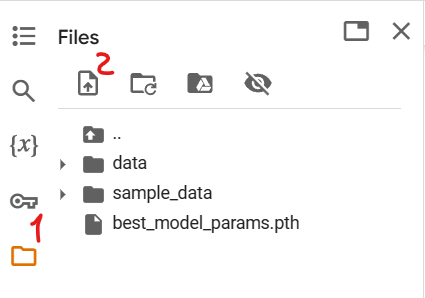

Ширина и высота (225, 225), количество каналов 1


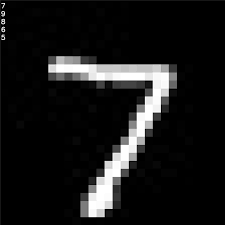

In [35]:
from PIL import Image
img = Image.open('7.png')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

**Соответствует ли изображение требованиям?**

Ваш ответ: да

Если количество каналов у вас больше одного, то код далее поможет это исправить.

In [36]:
import torchvision.transforms as transforms

# Раскомментируйте, если у вас цветное изображение
transform_grayscale = transforms.Grayscale()
img = transform_grayscale(img.resize((28,28)))
# img = np.array(img).reshape(-1, 28, 28, 1)
transform_to_tensor = transforms.ToTensor()
x = transform_to_tensor(img)

print(x.size())


torch.Size([1, 28, 28])


Но работа нашей модели строилась с учетом использования пакетов данных (batches), которые создавали экземпляры класса DataLoader, поэтому для использования одного изображения нам надо имитировать пакет из одного изображения. С этим поможет метод тензора `unsqueeze`, а чтобы не создавать отдельную переменную можно воспользоваться методом `unsqueeze_`.

In [37]:
x = x.unsqueeze(0)


Изображение подготовлено, теперь необходимо воссоздать модель и загрузить в нее параметры, которые дали наилучший результат при обучении.

In [38]:
best_model = MLP()  # Новый экземпляр класса модели
best_model_params = torch.load('best_model_params.pth')  # Укажите путь до сохраненного файла
state_dict = best_model_params['model_state_dict']  # Из best_model_params извлеките по соответствующему ключу параметры модели
best_model.load_state_dict(state_dict)  # Для best_model используйте метод load_state_dict и передайте в него словарь с параметрами
best_model.eval()  # Переключите модель в режим проверки (было в цикле обучения)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

Осталось воспользоваться моделью. Передайте на вход модели подготовленный тензор. Из вывода модели получите индекс наибольшего значения (`argmax`) и по индексу получите результат из массива ярлыков классов (`test_set.classes`).

In [39]:
output = best_model(x)
predicted_class = output.argmax(dim=1)
predicted_label = test_set.classes[predicted_class]
print(predicted_label)

7 - seven


**Правильно ли предсказала модель цифру?**

Ваш ответ: Верно, число 7 на изображении, а выдалось 7

**Лучшая точность на тестовой выборке для вашей модели.**

Ваш ответ: 95.93%

**Что такое пакет данных (batch)?**

Ваш ответ: Пакет данных (или "batch") в машинном обучении представляет собой набор примеров данных, который обрабатывается одновременно алгоритмом машинного обучения. В контексте библиотеки PyTorch, пакет данных представляет собой набор тензоров, содержащих входные данные (например, изображения) и соответствующие им целевые метки или выходные данные.

**В чем заключается смысл стохастического градиентного спуска?**

Ваш ответ: Смысл стохастического градиентного спуска (SGD) заключается в оптимизации параметров модели путем минимизации функции потерь. Основная идея SGD состоит в том, чтобы на каждом шаге обновления параметров использовать только часть данных (пакет данных или "batch") вместо всего набора данных. Это позволяет ускорить процесс обучения и улучшить сходимость модели.